# Collecting Tweets

This notebook shows how to collect tweets. For analyzing words you want to collect by search term, but collecting tweets from a specific user is also possible.

In [1]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [ ]:
twit_mars = Twords()
# set path to folder that contains jar files for twitter search
twit_mars.jar_folder_path = "../jar_files_and_background/"

## Collect Tweets by search term

### Function: create_java_tweets

This function collects tweets and puts them into a single folder in the form needed to read them into a Twords object using get_java_tweets_from_csv_list.

For more information of create_java_tweets arguments see source code in twords.py file

**total_num_tweets**: (int) total number of tweets to collect

**tweets_per_run**: (int) number of tweets per call to java tweet collector; from experience best to keep around 10,000 for large runs (for runs less than 10,000 can just set tweets_per_run to same value as total_num_tweets)

**querysearch**: (string) search query - for example, "charisma" or "mars rover"; a space between words implies an "and" operator between them: only tweets with both terms will be returned

**final_until**: (string) the date to search backward in time from; has form '2015-07-31'; for example, if date is '2015-07-31', then tweets are collected backward in time from that date. If left as None, uses current date to search backward from

**output_folder**: (string) name of folder to put output files in

**decay_factor**: (int) how quickly to wind down tweet search if errors occur and no tweets are found in a run - a failed run will count as tweets_per_run/decay_factor tweets found, so the higher the factor the longer the program will try to search for tweets even if it gathers none in a run

**all_tweets**: (bool) whether to return "all tweets" (as defined on twitter website) or "top tweets"; the details behind these designations are mysteries only Twitter knows, but from experiment on website "top tweets" appear to be subset of "all tweets" that Twitter considers interesting; there is no guarantee that this will return literally every tweet, and experiment suggests even "all tweets" does not return every single tweet that given search query may match

Try collecting tweets about the mars rover:

In [ ]:
twit_mars.create_java_tweets(total_num_tweets=100, tweets_per_run=50, querysearch="mars rover",
                           final_until=None, output_folder="mars_rover",
                           decay_factor=4, all_tweets=True)

In [ ]:
twit_mars.get_java_tweets_from_csv_list()

In [ ]:
twit_mars.tweets_df.head(5)

## Collect Tweets from user

### Function: get_all_user_tweets

This function collects all user tweets that are available from twitter website by scrolling. As an example, a run of this function collected about 87% of the tweets from user barackobama.

To avoid problems with scrolling on the website (which is what the java tweet collector programmatically does), best if tweets_per_run is set to be around 500. 

This function may sometimes return multiple copies of the same tweet, which can be removed in the resulting pandas dataframe once the data is read into Twords.

**user**: (string) twitter handle of user to gather tweets from

**tweets_per_run** (int) number of tweets to collect in a single call to java tweet collector; some experimentation is required to see which number ends up dropping the fewest tweets - 500 seems to be a decent value

In [ ]:
twit = Twords()
twit.jar_folder_path = "../jar_files_and_background/"
twit.get_all_user_tweets("barackobama", tweets_per_run=500)

In [2]:
twit = Twords()
twit.data_path = "barackobama"
twit.get_java_tweets_from_csv_list()
twit.convert_tweet_dates_to_standard()

If you want to sort the tweets by retweets or favorites, you'll need to convert the retweets and favorites columns from unicode into integers: 

In [3]:
twit.tweets_df["retweets"] = twit.tweets_df["retweets"].map(int)
twit.tweets_df["favorites"] = twit.tweets_df["favorites"].map(int)

In [4]:
twit.tweets_df.sort_values("favorites", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
3283,NaN,2012-11-06,942849,625349,Four more years.pic.twitter.com/bAJE6Vom,NaN,NaN,266031293945503744,https://twitter.com/BarackObama/status/266031293945503744
12280,NaN,2017-01-22,83012,395256,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views.",NaN,NaN,823174199036542980,https://twitter.com/realDonaldTrump/status/823174199036542980
11781,NaN,2017-01-22,83012,395256,"Peaceful protests are a hallmark of our democracy. Even if I don't always agree, I recognize the rights of people to express their views.",NaN,NaN,823174199036542980,https://twitter.com/realDonaldTrump/status/823174199036542980
12431,NaN,2016-12-31,141348,350024,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",NaN,NaN,815185071317676033,https://twitter.com/realDonaldTrump/status/815185071317676033
11932,NaN,2016-12-31,141348,350024,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",NaN,NaN,815185071317676033,https://twitter.com/realDonaldTrump/status/815185071317676033


In [5]:
twit.tweets_df.sort_values("retweets", ascending=False)[:5]

,username,date,retweets,favorites,text,mentions,hashtags,id,permalink
3283,NaN,2012-11-06,942849,625349,Four more years.pic.twitter.com/bAJE6Vom,NaN,NaN,266031293945503744,https://twitter.com/BarackObama/status/266031293945503744
3286,NaN,2012-11-06,278901,72225,RT if you're on #TeamObama tonight.,NaN,#TeamObama,266012432177197056,https://twitter.com/BarackObama/status/266012432177197056
3285,NaN,2012-11-06,254024,106966,This happened because of you. Thank you.,NaN,NaN,266030802482126848,https://twitter.com/BarackObama/status/266030802482126848
11078,NaN,2015-06-26,199111,147797,Retweet to spread the word. #LoveWinspic.twitter.com/JJ5iCP4ZWn,NaN,#LoveWinspic,614459251126173697,https://twitter.com/BarackObama/status/614459251126173697
12431,NaN,2016-12-31,141348,350024,"Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!",NaN,NaN,815185071317676033,https://twitter.com/realDonaldTrump/status/815185071317676033


## For fun: A look at Barack Obama's tweets

The Twords word frequency analysis can also be applied to these tweets. In this case there was no search term. 

In [6]:
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.create_Stop_words()

In [7]:
twit.keep_column_of_original_tweets()
twit.lower_tweets()
twit.keep_only_unicode_tweet_text()
twit.remove_urls_from_tweets()
twit.remove_punctuation_from_tweets()
twit.drop_non_ascii_characters_from_tweets()
twit.drop_duplicate_tweets()
twit.convert_tweet_dates_to_standard()
twit.sort_tweets_by_date()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.034 minutes
Tweets cleaned per minute: 398090.9


Make word frequency dataframe: 

In [8]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(10000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.021 minutes
Time to compute word bag:  0.017 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  4.4703 minutes


In [9]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background occurrences
94,sotu,187,0.001478,9718.434299,9.181780,11
124,middleclass,158,0.001249,5018.015096,8.520790,18
50,ofa,280,0.002213,4212.324464,8.345770,38
69,actonclimate,232,0.001834,2550.539318,7.844060,52
642,uninsured,35,0.000277,1333.902747,7.195864,15
770,ledbetter,29,0.000229,1275.269659,7.150913,13
711,equalpay,31,0.000245,1107.615674,7.009965,16
1025,speakerboehner,21,0.000166,1091.374975,6.995194,11
63,weve,248,0.001960,1042.461811,6.949340,136
1565,reelect,12,0.000095,762.230141,6.636249,9


In [10]:
twit.tweets_containing("sotu")[:10]

229 tweets contain this term


,username,text
517,NaN,the nation that leads the clean energy economy will be the nation that leads the global economy and america must be that nation sotu
520,NaN,all of our men and women in uniform around the world must know that they have our respect our gratitude and our full support sotu
521,NaN,i will not walk away from the millions of americans who need health care and neither should the people in this chamber sotu
522,NaN,in the 21st century one of the best antipoverty programs is a worldclass education sotu
523,NaN,we cant allow financial institutions including those that take your deposits to take risks that threaten the whole economy sotu
524,NaN,ofa staff will be tweeting highlights from tonights sotu address watch live at 9pm et
525,NaN,because of the recovery act there are about two million americans working right now who would otherwise be unemployed sotu
527,NaN,it is because of the spirit and resilience of americans that i have never been more hopeful about americas future than i am tonight sotu
528,NaN,america prevailed because we chose to move forward as one nation again we are tested and again we must answer historys call sotu
531,NaN,people are out of work they are hurting they need our help and i want a jobs bill on my desk without delay sotu


Now plot relative frequency results. We see from word_freq_df that the largest relative frequency terms are specialized things like "sotu" (state of the union) and specific policy-related words like "middle-class." We'll increase the requirement on background words to remove these policy-specific words and get at more general words that the president's twitter account nevertheless uses more often than usual: 

#### At least 100 background occurrences:

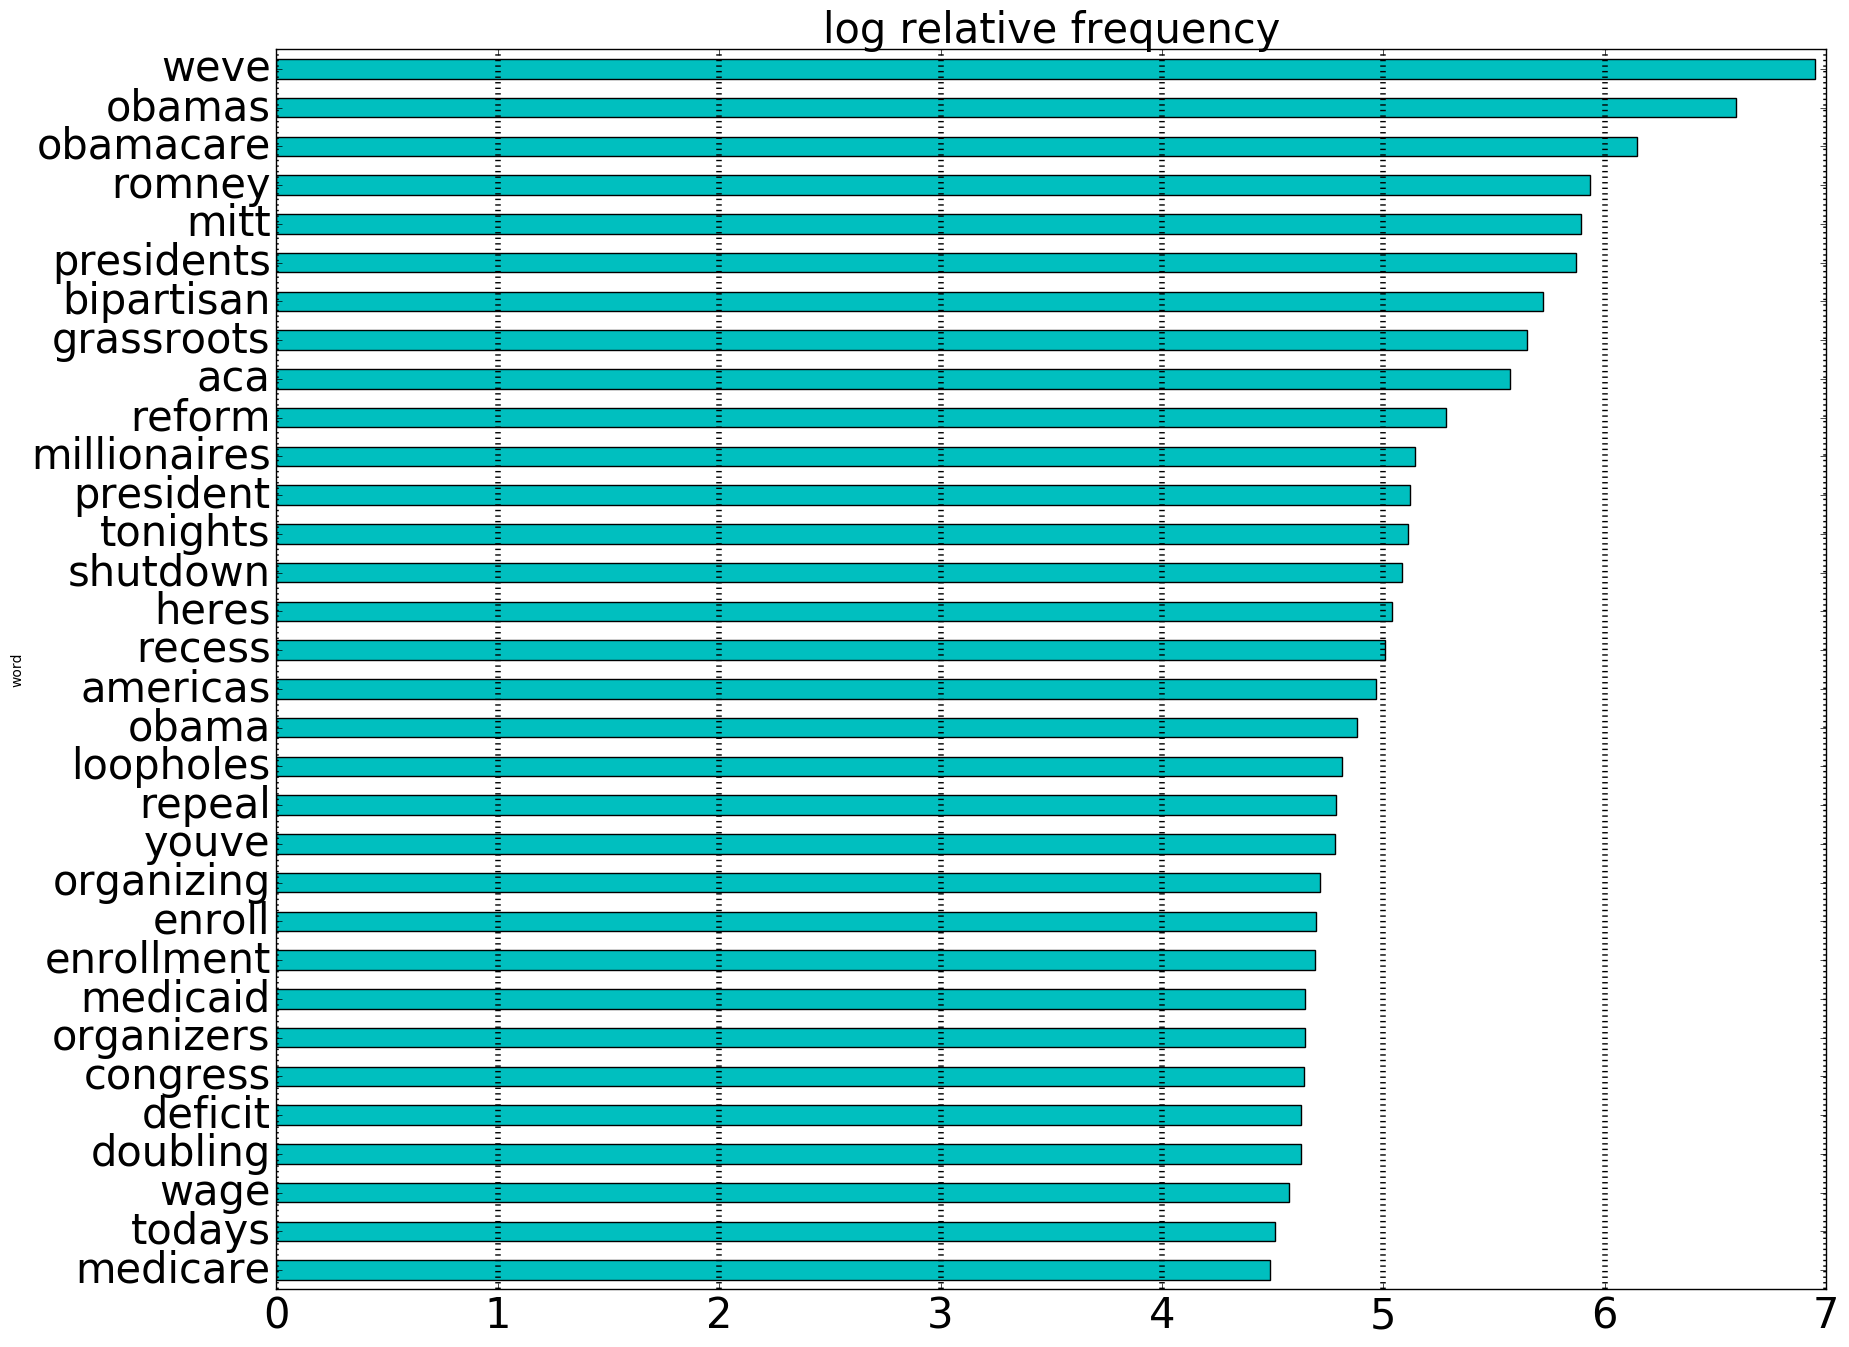

In [11]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

#### At least 1000 background occurrences:

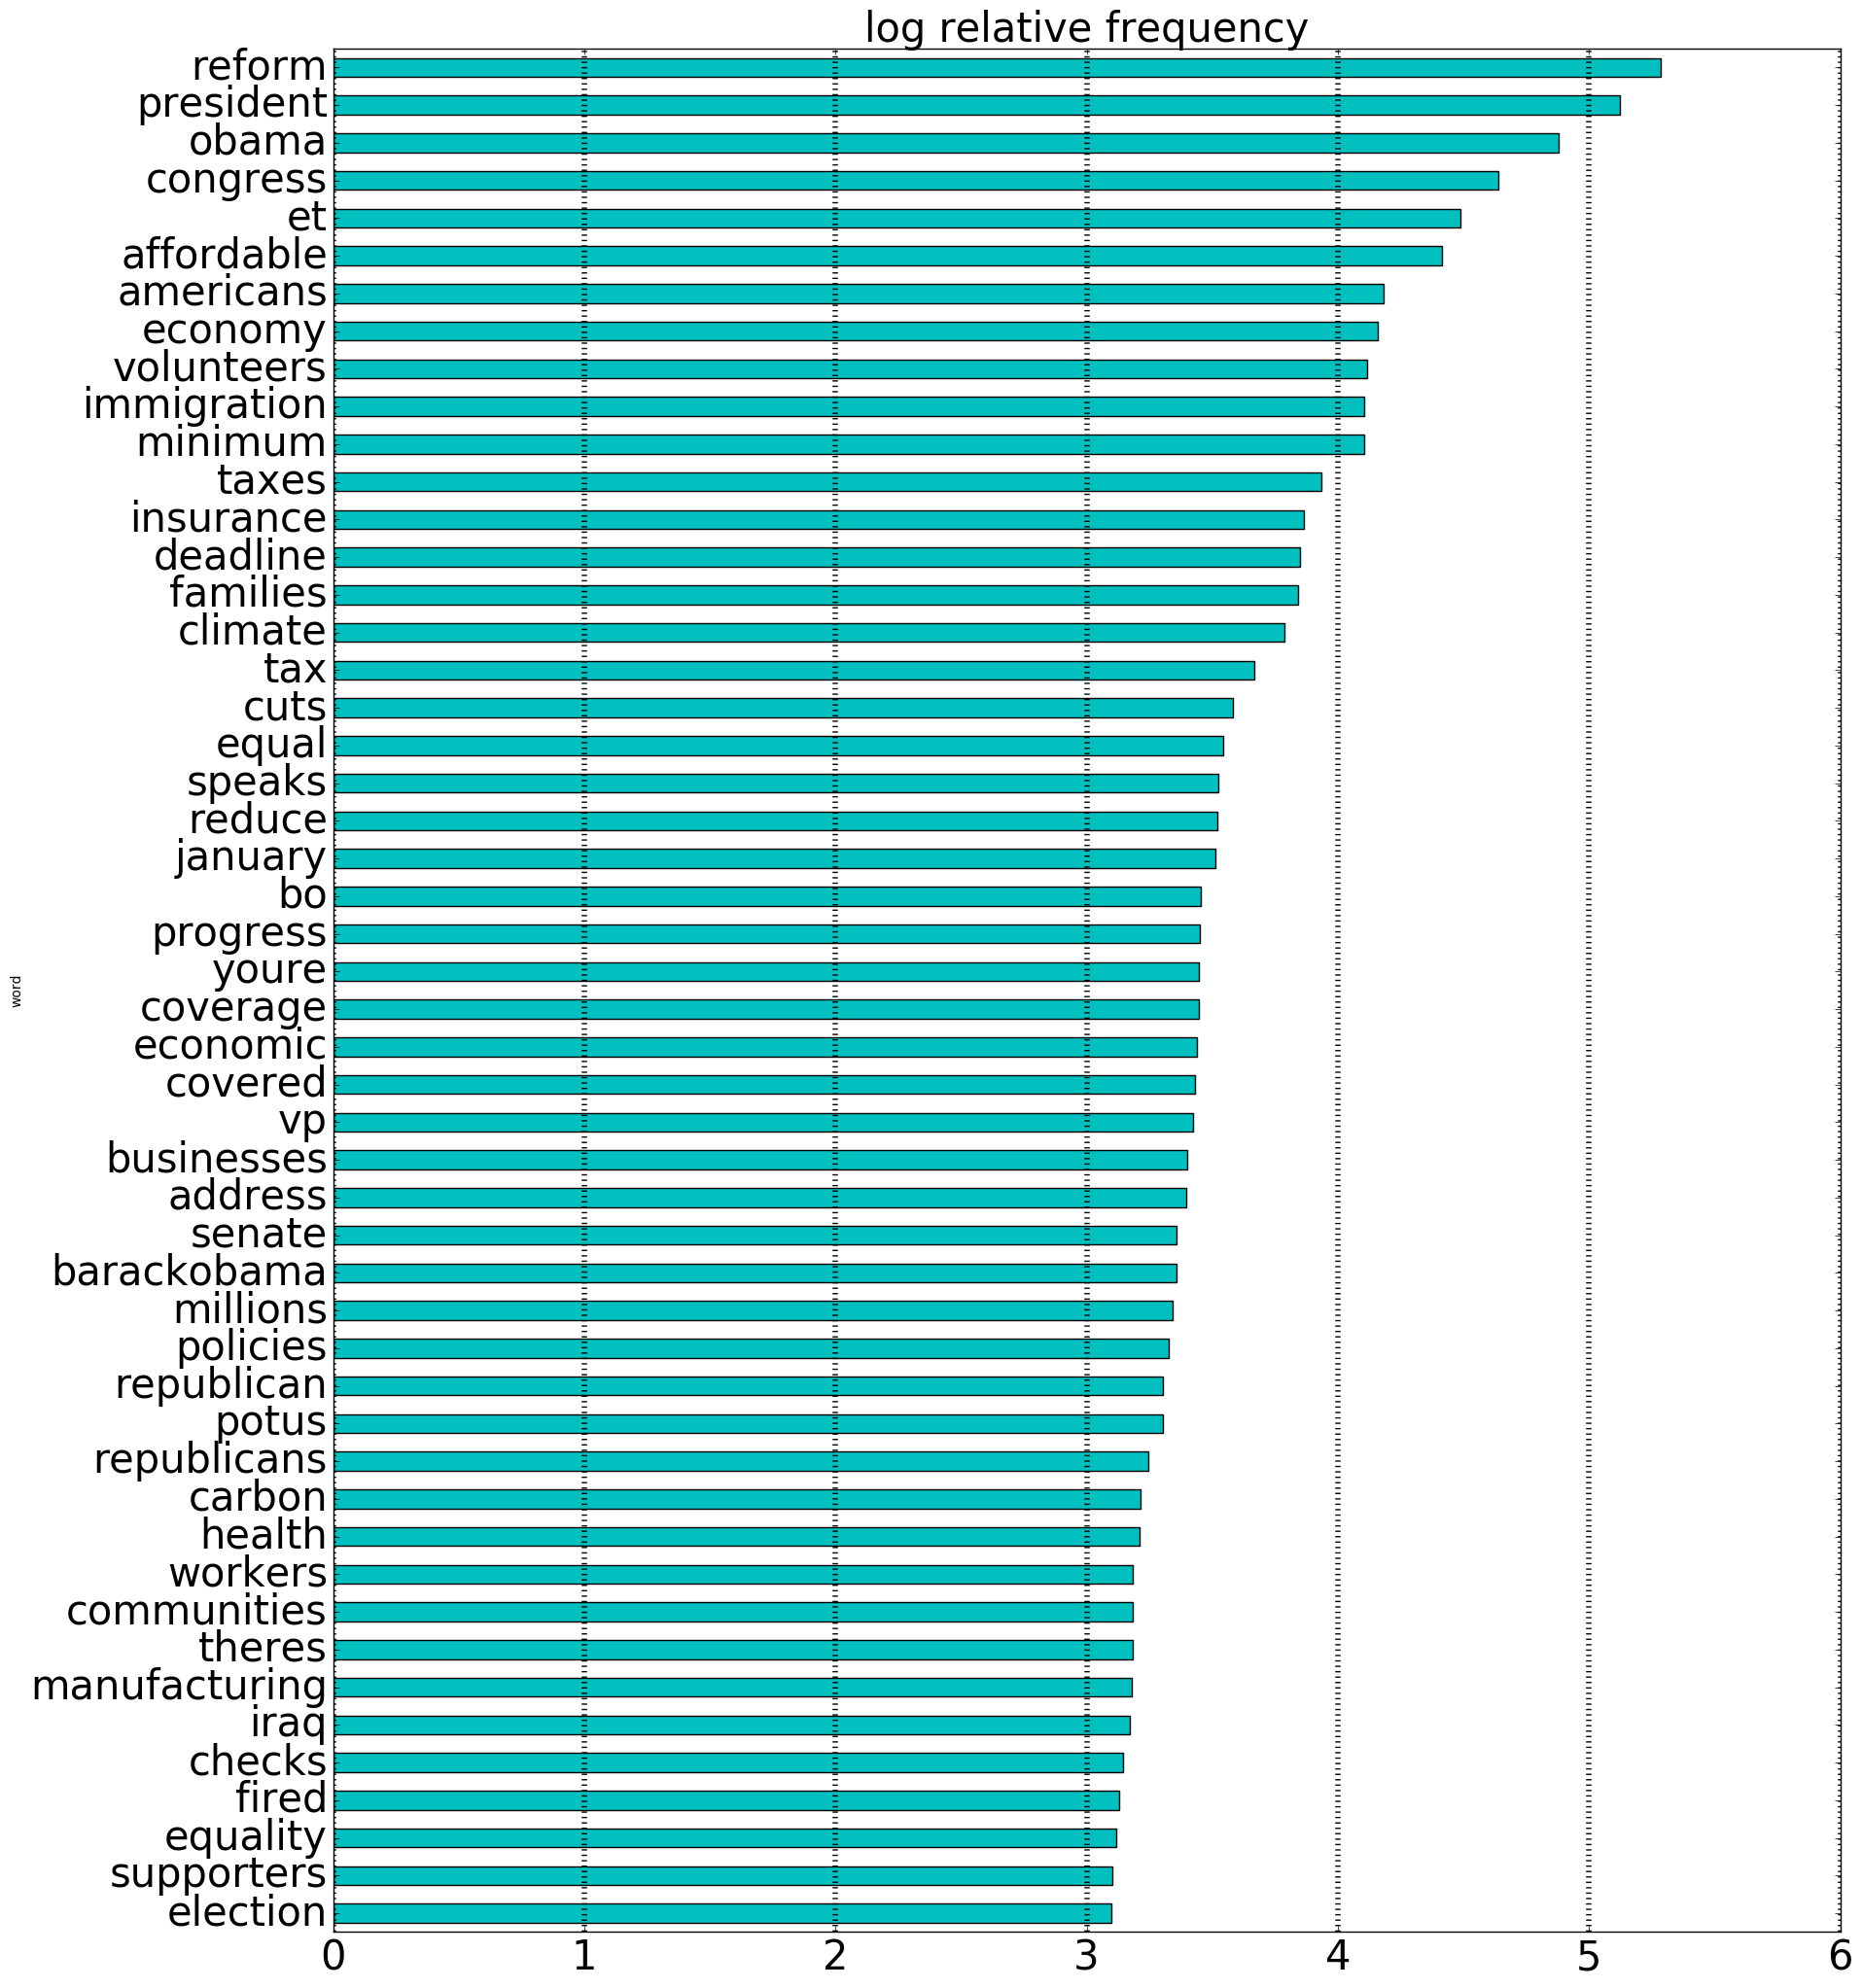

In [12]:
num_words_to_plot = 50
background_cutoff = 1000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

The month of January appears to carry special import with the president's twitter account.

#### At least 5000 background occurrences:

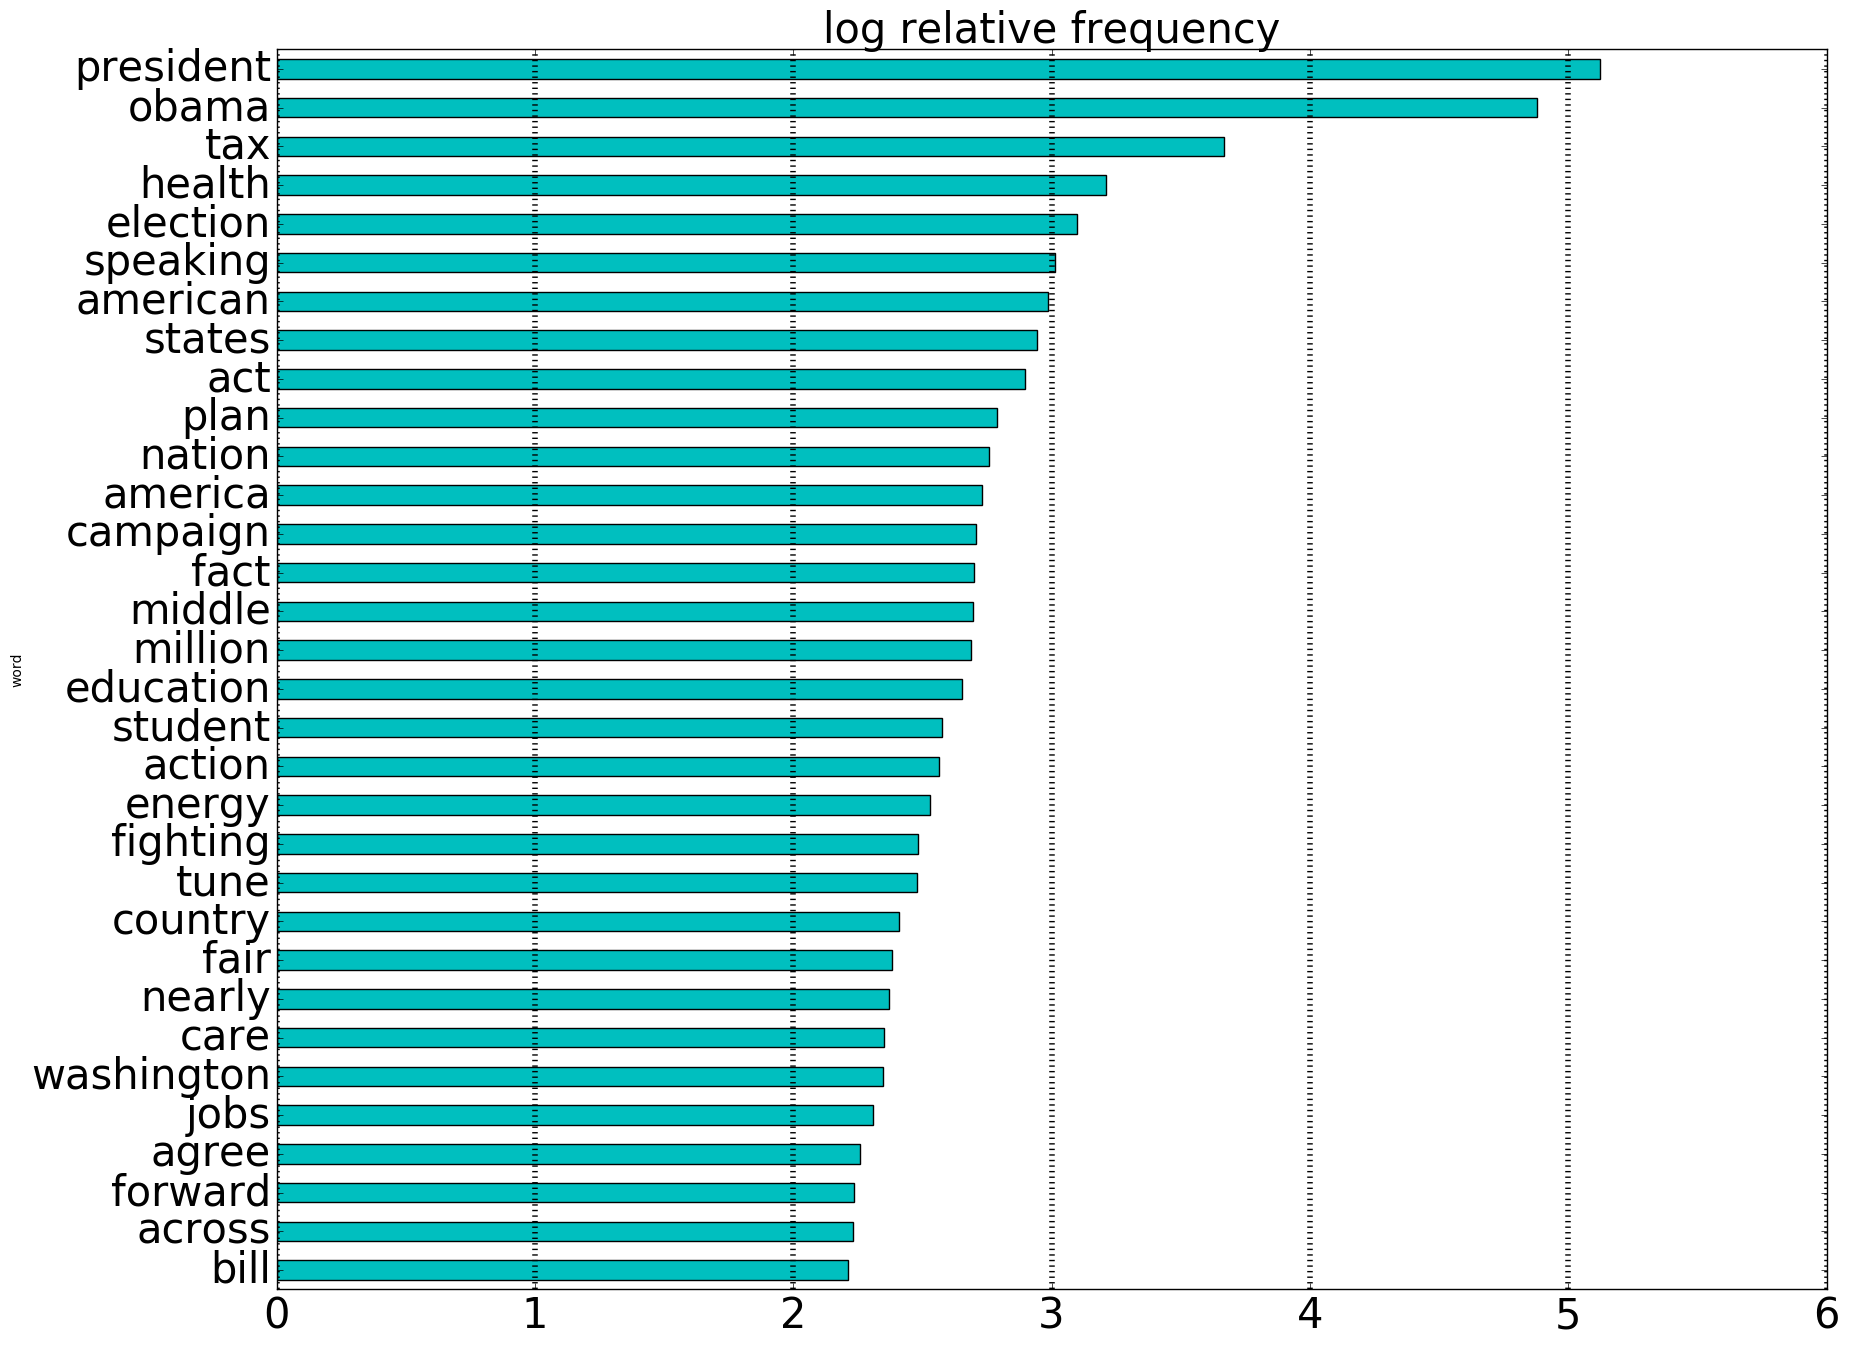

In [13]:
num_words_to_plot = 32
background_cutoff = 5000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

# And finally we'll look at the least presidential words on Barack Obama's twitter account:

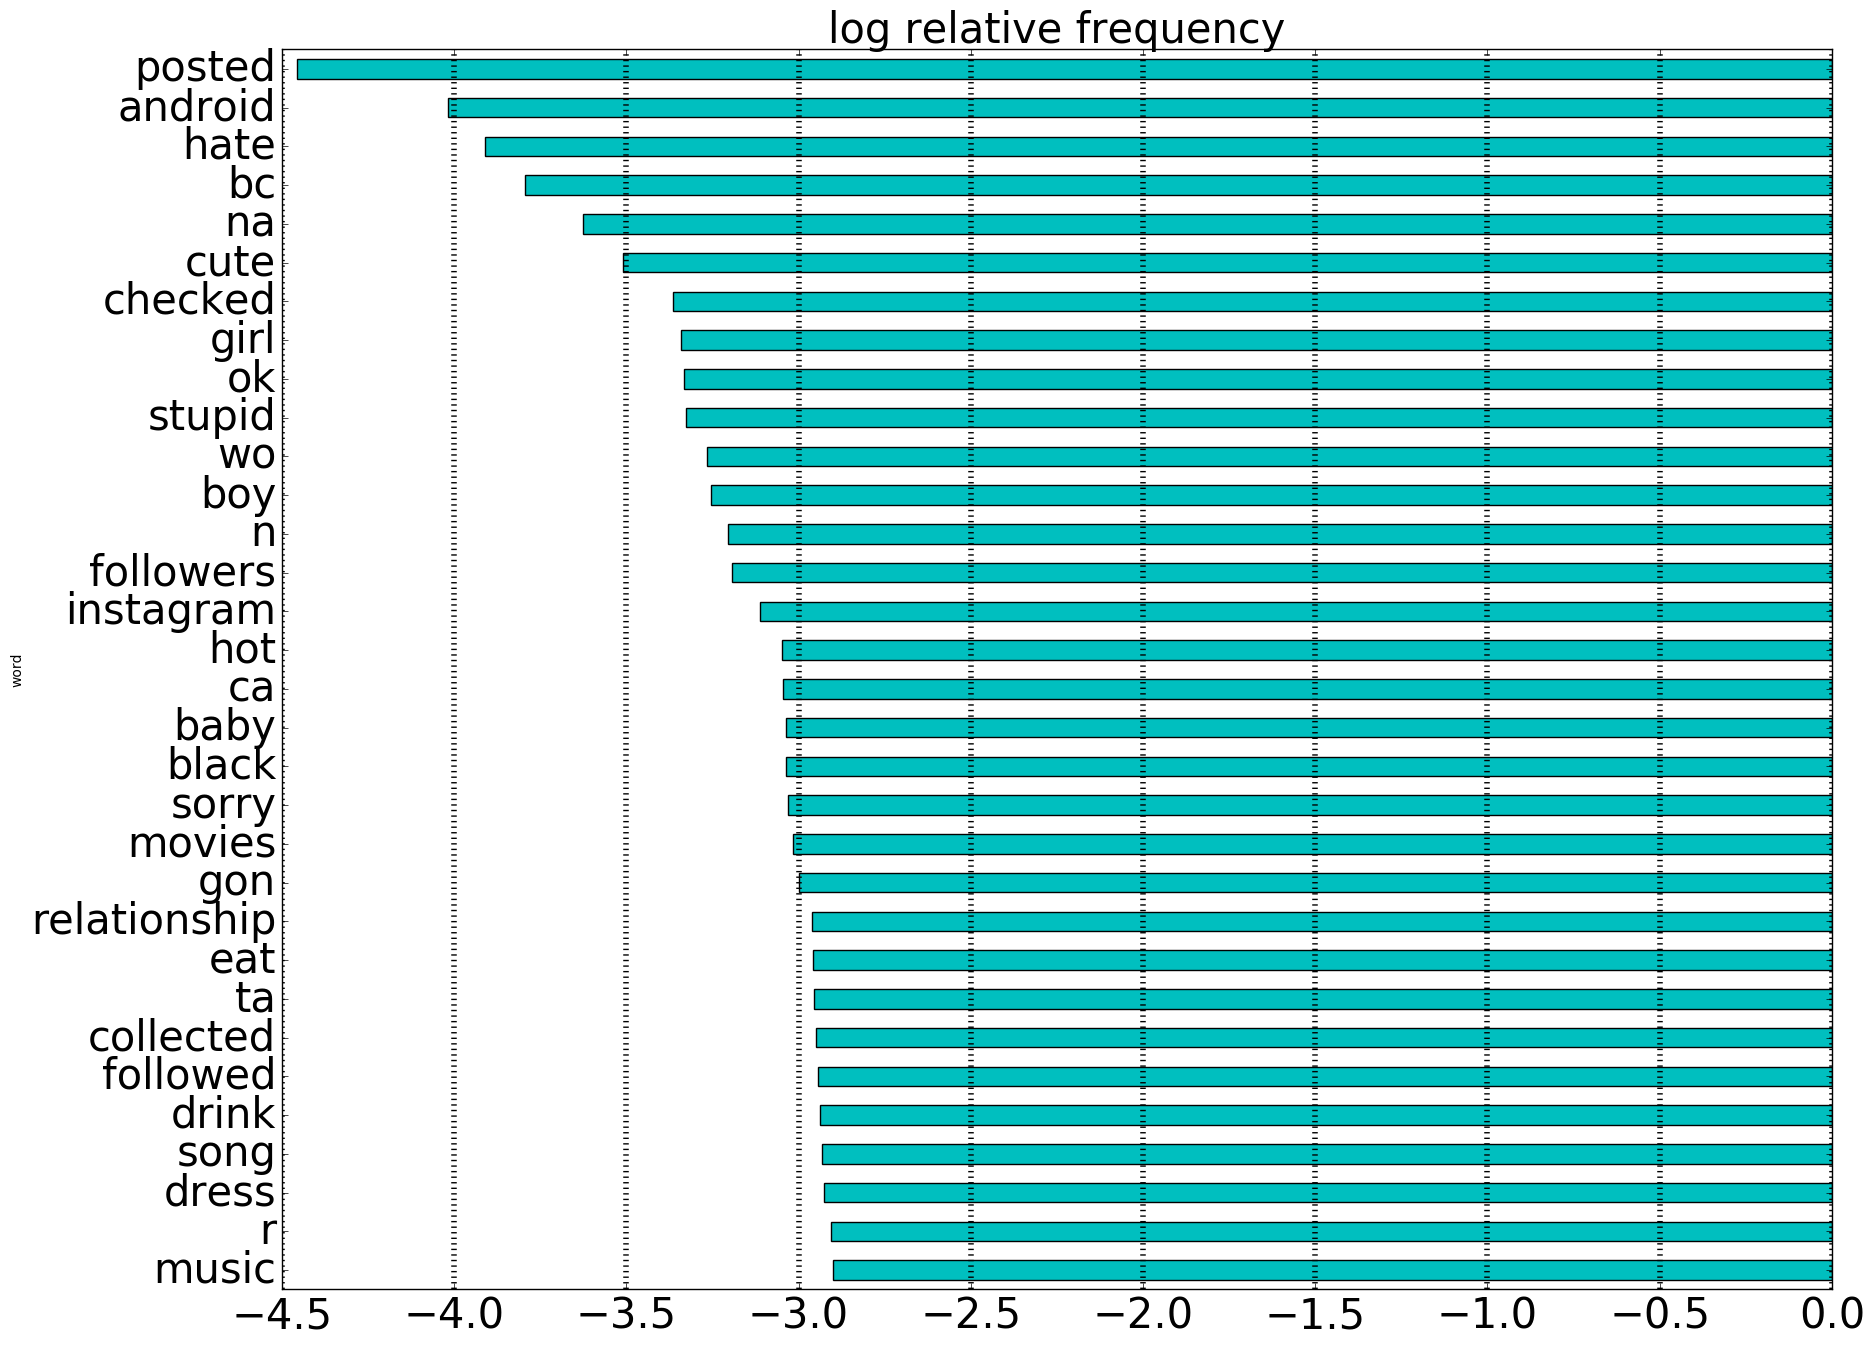

In [14]:
num_words_to_plot = 32
background_cutoff = 5000
twit.word_freq_df[twit.word_freq_df['background occurrences']>background_cutoff].sort_values("log relative frequency", ascending=False).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

The presidency is no place for posting hate or androids.